#  Merging all  Three files


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# read all csv files

Region =pd.read_csv('Region.csv')
StoreDetails = pd.read_csv('StoreDetails.csv',parse_dates=['Date'],dayfirst=True)
Weekly_Sales = pd.read_csv('Weekly_Sales.csv',parse_dates=['Date'],dayfirst=True)

In [3]:
Two_files_merged = pd.merge(StoreDetails,Weekly_Sales,on=['Store','Date']) # merge two files

In [4]:
merged_all_files = pd.merge(Two_files_merged,Region,on=['Store']) # merge third file

# compare average temperature of five different region's

In [5]:
Temperature = merged_all_files.groupby('Region', as_index=False)['Temperature'].mean() #get mean temperature of all region 
Temperature.head()

,Region,Temperature
0,A,64.370031
1,B,58.121694
2,C,54.159340
3,D,64.366472
4,E,62.301375


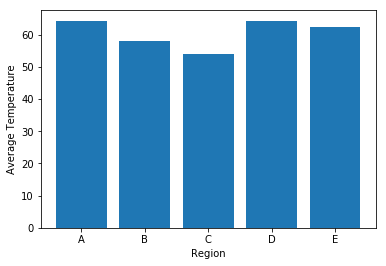

In [6]:
plt.bar(Temperature['Region'],Temperature['Temperature'])
plt.xticks(Temperature['Region'])
plt.xlabel('Region')
plt.ylabel('Average Temperature')
plt.show()




# analyze yearly average temperature and unemployment  for region A 

In [7]:
Region_A = merged_all_files[merged_all_files['Region']=='A'].copy()
df = Region_A[['Store','Date',]].copy()            
df['year'] = pd.to_datetime(df['Date']).dt.to_period('Y').copy()
Region_A['year'] = df['year'].copy()
Region_A = Region_A.groupby('year', as_index=False)['Temperature','Unemployment'].mean().copy()
Region_A.head()

,year,Temperature,Unemployment
0,2010,63.378727,7.397903
1,2011,63.117628,7.044934
2,2012,66.991137,6.152568


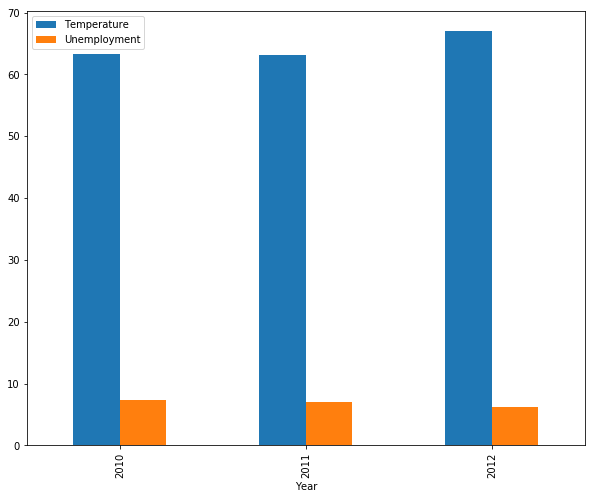

In [8]:
Region_A.plot(kind='bar',figsize=[10,8])
plt.xticks(Region_A.index,Region_A["year"].values)
plt.xlabel('Year')
plt.show()

# Weekly sales of Region B for 2010

In [9]:
Region_B = merged_all_files[merged_all_files['Region']=='B'].copy()
Region_B.drop(['Unemployment','Temperature','Store','Region'],axis=1,inplace=True)
Region_B['Year'] = pd.to_datetime(Region_B['Date']).dt.to_period('Y')
Region_B = Region_B[Region_B['Year']==2010].copy()
Region_B = Region_B.groupby('Date').sum().copy()


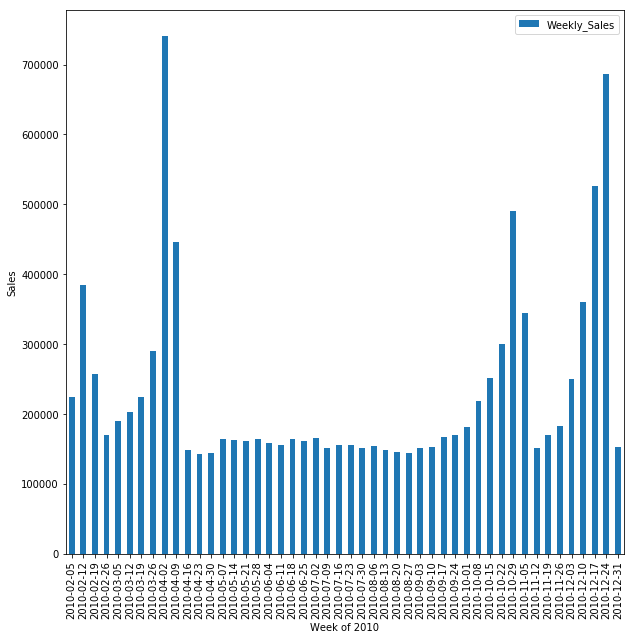

In [10]:
Region_B.index = Region_B.index.date # remove time stamp from date
Region_B.plot(kind='bar',figsize=[10,10])
plt.ylabel('Sales')
plt.xlabel('Week of 2010')
plt.show()

# sale of store for  region C in 2011

In [12]:
Region_C_for_sale = merged_all_files[merged_all_files['Region']=='C'].copy()
Region_C_for_sale['Year'] = pd.to_datetime(Region_C_for_sale['Date']).dt.to_period('Y').copy()
Region_C_Sale_2011 = Region_C_for_sale[Region_C_for_sale['Year']==2011].copy()
Region_C_Sale_2011.drop(['Temperature','Unemployment','Region','Date','Year'],axis=1,inplace=True)
Region_C_sale = Region_C_Sale_2011.groupby('Store',).sum().copy()
Region_C_sale.columns = ['Yearly_sale']

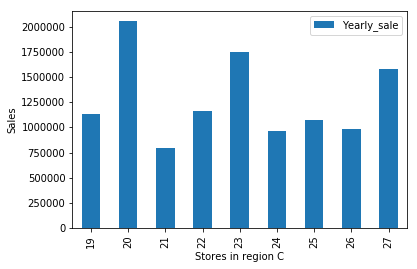

In [13]:
Region_C_sale.plot(kind='bar')
plt.ylabel('Sales')
plt.xlabel('Stores in region C')
plt.show()